# comparing models behavior with participants behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
import seaborn as sns 
import ast
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection
import warnings
warnings.filterwarnings("ignore")


In [2]:
output_dir = r"15_RL_agent_TDlearn_output_behavior"
os.makedirs(output_dir, exist_ok=True)


folder_path_participants = 'data_risk_added'
folder_path_colors = '11_RL_agent_TDlearn_output/model_behavior'
folder_path_numbers = '12_RL_agent_TDlearn_output/model_behavior'
folder_path_colors_numbers = '13_RL_agent_TDlearn_output/model_behavior'


df_participants = []
df_colors = []
df_numbers = []
df_colors_numbers = []


def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)





for file_name in os.listdir(folder_path_participants):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path_participants, file_name)
        df = pd.read_excel(file_path)
        df = df[df['outcome'].str.lower() != 'na'].reset_index(drop=True)  
        df_participants.append(df)

        clean_name = file_name.removeprefix("task_data_").removesuffix(".xlsx")


        def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)


        find_matching_csv(folder_path_colors, df_colors)
        find_matching_csv(folder_path_numbers, df_numbers)
        find_matching_csv(folder_path_colors_numbers, df_colors_numbers)


In [3]:
df_participants[2].head(5)

,arrowRT,distribution,interTrialInterval,outcome,myCard,yourCard,spaceRT,totalReward,trialIndex,trialType,choice,block,timeoutRepeat,risk
0,1067,uniform,894,win,3,9,4575,10.5,0,response,arrowdown,1,0,0.250
1,237,uniform,925,lose,2,1,1903,10.0,1,response,arrowdown,1,0,0.125
2,231,uniform,973,win,8,2,2130,10.5,2,response,arrowup,1,0,0.125
3,602,uniform,768,win,7,2,1537,11.0,3,response,arrowup,1,0,0.250
4,273,uniform,937,win,9,8,1809,11.5,4,response,arrowup,1,0,0.000


In [4]:
df_colors[2].head(5)

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,0,0,10.5,10.5,"[[0.43389134356196246, 0.017257467260049387], ..."
1,1,0,11.0,10.0,"[[-0.3721534744619285, 0.017257467260049387], ..."
2,1,1,11.5,10.5,"[[-0.3721534744619285, 0.4339142010837617], [0..."
3,1,1,12.0,11.0,"[[-0.3721534744619285, 0.49095308053009257], [..."
4,1,1,12.5,11.5,"[[-0.3721534744619285, 0.4987615077181903], [0..."


In [5]:
df_numbers[2].head()

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,0,0,10.5,10.5,"[[-0.005786009774610761, -0.000356453847500772..."
1,1,0,11.0,10.0,"[[-0.005786009774610761, -0.000356453847500772..."
2,1,1,11.5,10.5,"[[-0.005786009774610761, -0.000356453847500772..."
3,1,1,12.0,11.0,"[[-0.005786009774610761, -0.000356453847500772..."
4,1,1,12.5,11.5,"[[-0.005786009774610761, -0.000356453847500772..."


In [6]:
df_colors_numbers[2].head(5)

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,0,0,10.5,10.5,"[[[-0.02043867387785598, -0.000672324798613683..."
1,1,0,11.0,10.0,"[[[-0.02043867387785598, -0.000672324798613683..."
2,1,1,11.5,10.5,"[[[-0.02043867387785598, -0.000672324798613683..."
3,1,1,12.0,11.0,"[[[-0.02043867387785598, -0.000672324798613683..."
4,1,1,12.5,11.5,"[[[-0.02043867387785598, -0.000672324798613683..."


# COLOR abs(delta q values) correlatation with spaceRT and arrowRT

In [22]:
distributions_map = {"uniform": 0, "low": 1, "high": 2}
actions = {"arrowdown": 0, "arrowup": 1}

spaceRT_participants = []
arrowRT_participants = []

delta_q_val_uniform = []
delta_q_val_low = []
delta_q_val_high = []

for df in df_participants:
    spaceRT_normalized = np.array(df['spaceRT'], dtype=float) / np.mean(df['spaceRT'])
    spaceRT_participants.append(spaceRT_normalized)

    arrowRT_normalized = np.array(df['arrowRT'], dtype=float) / np.mean(df['arrowRT'])
    arrowRT_participants.append(arrowRT_normalized)

for df in df_colors:    
    delta_uniform, delta_low, delta_high = [], [], []
    temp_df = df['q_val']

    for q_vals in temp_df:
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, actions["arrowup"]] - temp_vec2[:, actions["arrowdown"]]
        delta_uniform.append(delta[distributions_map["uniform"]])
        delta_low.append(delta[distributions_map["low"]])
        delta_high.append(delta[distributions_map["high"]])

    delta_q_val_uniform.append(delta_uniform)
    delta_q_val_low.append(delta_low)
    delta_q_val_high.append(delta_high)


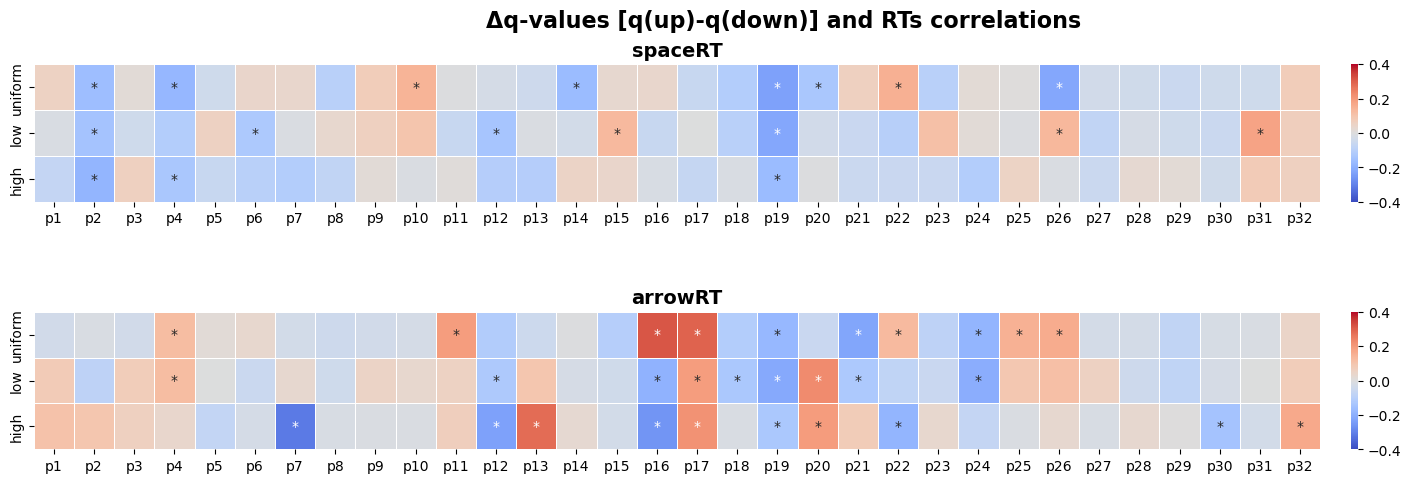

In [ ]:
spaceRT_participants = np.array(spaceRT_participants)
arrowRT_participants = np.array(arrowRT_participants)

# importannnttt: it's important that you find the abs value of delta q values
delta_q_val_uniform = np.array(abs(delta_q_val_uniform))
delta_q_val_low = np.array(abs(delta_q_val_low))
delta_q_val_high = np.array(abs(delta_q_val_high))

num_participants = spaceRT_participants.shape[0]

correlations_spaceRT = np.zeros((num_participants, 3))
correlations_arrowRT = np.zeros((num_participants, 3))
p_values_spaceRT = np.zeros((num_participants, 3))
p_values_arrowRT = np.zeros((num_participants, 3))

for i in range(num_participants):
    for j, delta_q_val in enumerate([delta_q_val_uniform, delta_q_val_low, delta_q_val_high]):
        corr, p_val = pearsonr(spaceRT_participants[i, :], delta_q_val[i, :])
        correlations_spaceRT[i, j] = corr
        p_values_spaceRT[i, j] = p_val

        corr, p_val = pearsonr(arrowRT_participants[i, :], delta_q_val[i, :])
        correlations_arrowRT[i, j] = corr
        p_values_arrowRT[i, j] = p_val

####################################################################################################################
####################################################################################################################

correlations_spaceRT = correlations_spaceRT.T
correlations_arrowRT = correlations_arrowRT.T
p_values_spaceRT = p_values_spaceRT.T
p_values_arrowRT = p_values_arrowRT.T

annot_spaceRT = np.array([["*" if p_values_spaceRT[j, i] < 0.05 else "" 
                            for i in range(num_participants)] for j in range(3)])
annot_arrowRT = np.array([["*" if p_values_arrowRT[j, i] < 0.05 else "" 
                            for i in range(num_participants)] for j in range(3)])



fig, axes = plt.subplots(2, 1, figsize=(20, 5), gridspec_kw={'hspace': 0.8})

xticklabels = [f'p{i+1}' for i in range(num_participants)]
yticklabels = ['uniform', 'low', 'high']

sns.heatmap(correlations_spaceRT, cmap='coolwarm', linewidths=0.5,
            xticklabels=xticklabels, yticklabels=yticklabels,
            cbar=True, vmin=-0.4, vmax=0.4, ax=axes[0],
            cbar_kws={'pad': 0.02}, annot=annot_spaceRT, fmt='')
axes[0].set_title("spaceRT", fontsize=14, fontweight='bold')

sns.heatmap(correlations_arrowRT, cmap='coolwarm', linewidths=0.5,
            xticklabels=xticklabels, yticklabels=yticklabels,
            cbar=True, vmin=-0.4, vmax=0.4, ax=axes[1],
            cbar_kws={'pad': 0.02}, annot=annot_arrowRT, fmt='')
axes[1].set_title("arrowRT", fontsize=14, fontweight='bold')

fig.suptitle('Δq-values [q(up)-q(down)] and RTs correlations', fontsize=16, fontweight='bold', y=0.99)


plt.tight_layout(rect=[0, 0, 1, 1])

filename = os.path.join(output_dir, "correlation_qVal_spaceRT_arrowRT_colors.pdf")
plt.savefig(filename, format='pdf')

plt.show()


# NUMBERS abs(delta q values) correlatation with spaceRT and arrowRT 

# BOTH abs(delta q values) correlatation with spaceRT and arrowRT 